In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#Prepare dataframes for the testing.
#---------------------------------------------------------------------


In [5]:
# Upload Dataframes:
startEvtmc = 2000001 
stopEvtmc  = 4000001 
qr_mc= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc.loadDF("/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYJetsToLL_13TeV_EBHighR9", "DYJetsToLL_13TeV_EBLowR9", "DYJetsToLL_13TeV_EEHighR9", "DYJetsToLL_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)
startEvtdata = 2000001 
stopEvtdata  = 4000001 
qr_data.loadDF(" /mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rn.run2016B[0],rn.run2016H[1])
dfmc= qr_mc.getDF()
dfdata=qr_data.getDF()

NT branches: 
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EEHighR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EELowR9
number of events: 7073020
# lead eleMatch    =  6081954
# sublead eleMatch =  5528292
MC Sublead
lead size:  6081954
MC Lead
sublead size:  5528292
Count final dataset
11610246
Apply basic selection
 ptmin  =  25.0 
 ptmax  =  150.0  
 etamin =  -2.5  
 etamax =  2.5  
 phimin =  -3.14  
 phimax =  3.14
Reshuffle events rndm seed  =  12345
Selecting events   [ 2000001 ,  4000001 ]  out of  11554791
DataFrame size =  2000000
NT branches: 
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EELowR9
number of events: 153553

In [6]:
#insert run period into dataframe
#create vector of run periods with the ends of each one.:
runPeriod=[272006,276812,277420,278810,280386,284046]
dfdata['runperiod'] = np.digitize(dfdata['run'],runPeriod)

In [7]:
#divide data frames to apply weights.
dfdata1   = dfdata  .query('runperiod==1').reset_index()  
dfdata2   = dfdata  .query('runperiod==2').reset_index()  
dfdata3   = dfdata  .query('runperiod==3').reset_index()  
dfdata4   = dfdata  .query('runperiod==4').reset_index()  
dfdata5   = dfdata  .query('runperiod==5').reset_index()  

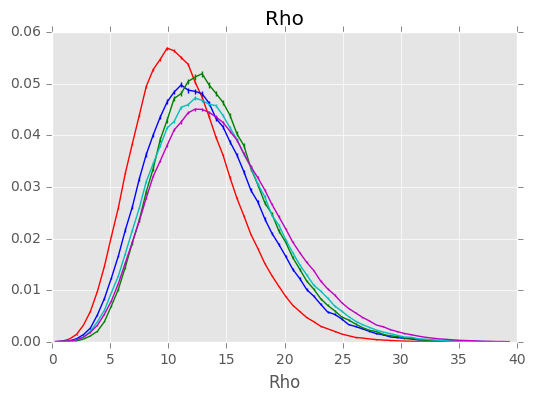

In [8]:
#check pileup
rv=np.arange(0,40,0.6)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Rho")
#plot histograms
plot.plotHistErr(dfdata1.loc[:,"rho"], rv,Color="r")
plot.plotHistErr(dfdata2.loc[:,"rho"], rv,Color="b")
plot.plotHistErr(dfdata3.loc[:,"rho"], rv,Color="g")
plot.plotHistErr(dfdata4.loc[:,"rho"], rv,Color="c")
plot.plotHistErr(dfdata5.loc[:,"rho"], rv,Color="m")
plot.plotHistErr(dfmc.loc[:,"rho"], rv,Color="k")
ax.set_title("Rho")

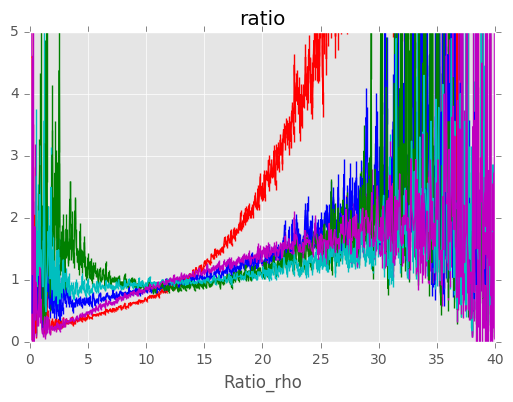

In [13]:
#so the pileup is different for every run, let's do the ratio first:
rv=np.arange(0,40,0.06)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Ratio_rho")

#Do the Ratio wrt the last 
plot.plotHistRatio(dfdata5.loc[:,"rho"],dfdata1.loc[:,"rho"],rv, Color="r")
plot.plotHistRatio(dfdata5.loc[:,"rho"],dfdata2.loc[:,"rho"],rv, Color="b")
plot.plotHistRatio(dfdata5.loc[:,"rho"],dfdata3.loc[:,"rho"],rv, Color="g")
plot.plotHistRatio(dfdata5.loc[:,"rho"],dfdata4.loc[:,"rho"],rv, Color="c")
plot.plotHistRatio(dfdata5.loc[:,"rho"],dfmc.loc[:,"rho"],rv, Color="m",Weight2=dfmc["weight"])

ratiodata1,edge,ratiodataErr= plot.getHistRatio(dfdata5.loc[:,"rho"],dfdata1.loc[:,"rho"],rv)
ratiodata2,edge,ratiodataErrE= plot.getHistRatio(dfdata5.loc[:,"rho"],dfdata2.loc[:,"rho"],rv)
ratiodata3,edge,ratiodataErrF= plot.getHistRatio(dfdata5.loc[:,"rho"],dfdata3.loc[:,"rho"],rv)
ratiodata4,edge,ratiodataErrG= plot.getHistRatio(dfdata5.loc[:,"rho"],dfdata4.loc[:,"rho"],rv)
ratiomc,edge,ratiodataErrG= plot.getHistRatio(dfdata5.loc[:,"rho"],dfmc.loc[:,"rho"],rv,Weight2=dfmc["weight"])

ax.set_ylim([0,5])
ax.set_title('ratio')

In [14]:
import pandas as pd
#find correction and create weight vector.
dfdata1['bin'] = np.digitize(dfdata1['rho'],edge)
dfdata1["weight"]= ratiodata1[dfdata1['bin'].values-1]

dfdata2['bin'] = np.digitize(dfdata2['rho'],edge)
dfdata2["weight"]= ratiodata2[dfdata2['bin'].values-1]

dfdata3['bin'] = np.digitize(dfdata3['rho'],edge)
dfdata3["weight"]= ratiodata3[dfdata3['bin'].values-1]

dfdata4['bin'] = np.digitize(dfdata4['rho'],edge)
dfdata4["weight"]= ratiodata4[dfdata4['bin'].values-1]

dfmc['bin'] = np.digitize(dfmc['rho'],edge)
dfmc["weight"]=dfmc["weight"]*ratiomc[dfmc['bin'].values-1]

#cut some infinities:
dfdata1= dfdata1.query("weight<1000")
dfdata2= dfdata2.query("weight<1000")
dfdata3= dfdata3.query("weight<1000")
dfdata4= dfdata4.query("weight<1000")
dfmc=dfmc.query("weight<1000")

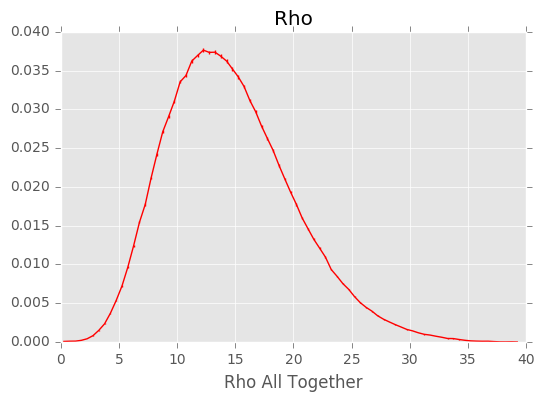

In [25]:
#Check if now Rho Match
rv=np.arange(0,40,0.5)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Rho All Together")
#plot histograms
plot.plotHistErr(dfdata1.loc[:,"rho"], rv,Color="r", Weight=dfdata1["weight"])
plot.plotHistErr(dfdata2.loc[:,"rho"], rv,Color="b", Weight=dfdata2["weight"])
plot.plotHistErr(dfdata3.loc[:,"rho"], rv,Color="g", Weight=dfdata3["weight"])
plot.plotHistErr(dfdata4.loc[:,"rho"], rv,Color="c", Weight=dfdata4["weight"])
plot.plotHistErr(dfdata5.loc[:,"rho"], rv,Color="m", Weight=dfdata5["weight"])
plot.plotHistErr(dfmc.loc[:,"rho"], rv,Color="k", Weight=dfmc["weight"])
ax.set_title("Rho")

In [20]:
#concatenate data frames into one
frame = [dfdata1, dfdata2, dfdata3, dfdata4,dfdata5]
dfdataFinal = pd.concat(frame).reset_index(drop=True)   
print len(dfdataFinal.index),len(dfmc.index)

1999927 2000000


In [17]:
#create fake runperiod for mc.
#Assign weighted runperiod to MC
vecPeriod=np.array([len(dfdata.query("runperiod==1").index),
          len(dfdata.query("runperiod==2").index),
          len(dfdata.query("runperiod==3").index),
          len(dfdata.query("runperiod==4").index),
          len(dfdata.query("runperiod==5").index)])
print vecPeriod
vecPeriod=vecPeriod/float(vecPeriod.sum())
print vecPeriod
period=np.array([0,
                 vecPeriod[0],
                 vecPeriod[0]+vecPeriod[1],
                 vecPeriod[0]+vecPeriod[1]+vecPeriod[2],
                 vecPeriod[0]+vecPeriod[1]+vecPeriod[2]+vecPeriod[3],
                 vecPeriod[0]+vecPeriod[1]+vecPeriod[2]+vecPeriod[3]+vecPeriod[4]+0.1])
print period
dfmc["runperiod"]=np.digitize(np.random.rand(len(dfmc.index)),period)
vecPeriod=np.array([len(dfmc.query("runperiod==1").index),
          len(dfmc.query("runperiod==2").index),
          len(dfmc.query("runperiod==3").index),
          len(dfmc.query("runperiod==4").index),
          len(dfmc.query("runperiod==5").index)])
print vecPeriod

[722294 218474 167398 419676 472158]
[ 0.361147  0.109237  0.083699  0.209838  0.236079]
[ 0.        0.361147  0.470384  0.554083  0.763921  1.1     ]
[722320 218593 168027 419145 471915]


In [26]:
#store dataframe to file for training:
import pandas as pd
dfname =  'df_data_Check.h5'
hdf = pd.HDFStore(dfname)
hdf.put('df', dfdataFinal)
hdf.close()
dfname =  'df_mc_Check.h5'
hdf = pd.HDFStore(dfname)
hdf.put('df', dfmc)
hdf.close()